In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df= pd.read_csv("aug_train.csv")
df= df.drop(['enrollee_id'], axis= 1)
unspecified_cols= ['gender', 'major_discipline', 'company_type']
df[unspecified_cols]= df[unspecified_cols].fillna("Unspecified")
df['city']= df['city'].apply(lambda c: int(c[5:]))
df=df.dropna()

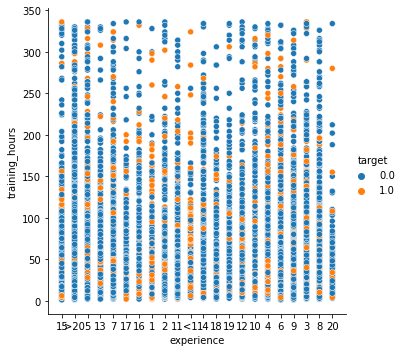

In [2]:
sns.relplot(x='experience',y='training_hours',hue='target',data=df)

In [3]:
df.corr()

,city,city_development_index,training_hours,target
city,1.000000,0.430151,-0.001705,-0.231037
city_development_index,0.430151,1.000000,-0.000117,-0.424525
training_hours,-0.001705,-0.000117,1.000000,-0.012117
target,-0.231037,-0.424525,-0.012117,1.000000


<AxesSubplot:xlabel='gender', ylabel='training_hours'>

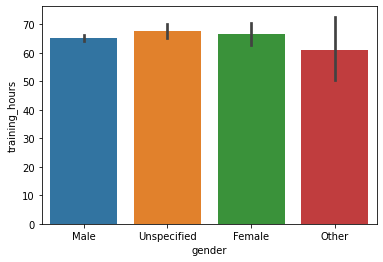

In [5]:
sns.barplot(x='gender',y='training_hours',data=df)

In [6]:
df.groupby('gender')['target'].mean()

gender
Female         0.157303
Male           0.161410
Other          0.130841
Unspecified    0.227961
Name: target, dtype: float64

<AxesSubplot:xlabel='gender'>

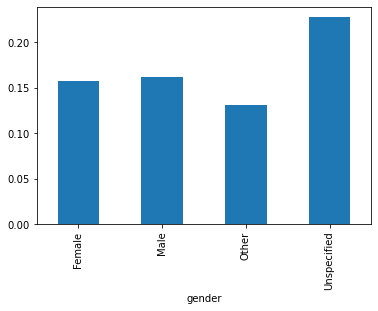

In [7]:
df.groupby('gender')['target'].mean().plot.bar()

In [9]:
from scipy.stats import ttest_ind
males = df[df['gender']=='male']
females=df[df['gender']=='female']
ttest_ind(males['city_development_index'],females['city_development_index'],nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

In [10]:
df.corr(method='pearson')

,city,city_development_index,training_hours,target
city,1.000000,0.430151,-0.001705,-0.231037
city_development_index,0.430151,1.000000,-0.000117,-0.424525
training_hours,-0.001705,-0.000117,1.000000,-0.012117
target,-0.231037,-0.424525,-0.012117,1.000000


In [11]:
pd.crosstab(df['gender'],df['major_discipline'])

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM,Unspecified
gender,,,,,,,
Female,29,16,84,7,23,705,26
Male,108,155,301,111,162,7629,666
Other,5,2,4,3,2,71,20
Unspecified,37,42,77,24,53,2149,193


In [14]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['gender'],df['major_discipline']))

(177.43867589371882,
 3.081971440014868e-28,
 18,
 array([[1.25401448e+01, 1.50621851e+01, 3.26464106e+01, 1.01582179e+01,
         1.68136020e+01, 7.39378149e+02, 6.34012909e+01],
        [1.28670340e+02, 1.54548174e+02, 3.34974181e+02, 1.04230164e+02,
         1.72518892e+02, 7.58651826e+03, 6.50539987e+02],
        [1.50763539e+00, 1.81084698e+00, 3.92490554e+00, 1.22126889e+00,
         2.02141058e+00, 8.88915302e+01, 7.62240239e+00],
        [3.62818797e+01, 4.35787941e+01, 9.44545025e+01, 2.93903495e+01,
         4.86460957e+01, 2.13921206e+03, 1.83436319e+02]]))

<AxesSubplot:xlabel='education_level', ylabel='training_hours'>

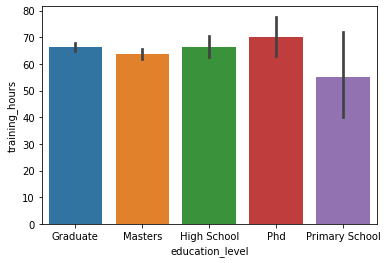

In [15]:
sns.barplot(x=df['education_level'],y=df['training_hours'])